In [1]:
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
from netCDF4 import Dataset
from matplotlib import gridspec
import glob
import cartopy.crs as ccrs
from matplotlib.pyplot import cm
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab



In [2]:
data_control_path = glob.glob("/data/keeling/a/pappup2/a/CESM/cam5_new/CESM_output_data/atm/hist/*") #End of year control
data_control_last18=data_control_path[24:240] # Get years 3-20
data_control_data = xr.open_mfdataset(data_control_last18,combine="by_coords",use_cftime=True)
data_control = data_control_data.mean('time') # Average over the last 18 years

data_50_path=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_50_n_w100/CESM_output_data/atm/hist/*")
data_50_last18=data_50_path[24:240] # Get years 3-20
data_50_data = xr.open_mfdataset(data_50_last18,combine="by_coords",use_cftime=True)
data_50_n = data_50_data.mean('time') # Average over the last 18 years

data_50_s=data_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))

data_50_path_ns=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_50_w100/CESM_output_data/atm/hist/*")
data_50_last18_ns=data_50_path_ns[24:240] # Get years 3-20
data_50_data_ns = xr.open_mfdataset(data_50_last18_ns,combine="by_coords",use_cftime=True)
data_50 = data_50_data_ns.mean('time') # Average over the last 18 years


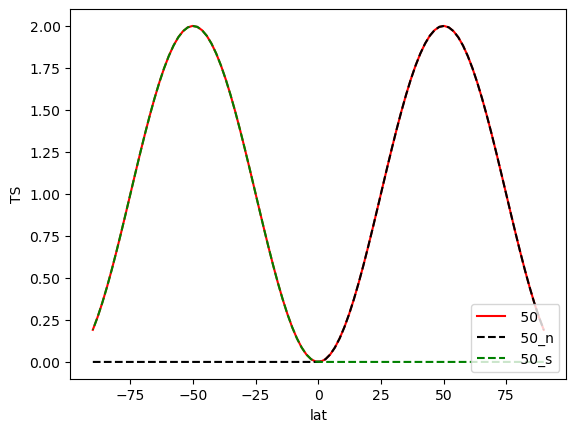

In [3]:
#surface_t2 = surface_t_2.mean('lon')
surface_t1 = data_50.TS.mean('lon')-data_control.TS.mean('lon')
surface_t1.plot(color="red",label=" 50")

surface_t2 = data_50_n.TS.mean('lon')-data_control.TS.mean('lon')
surface_t2.plot(color="black",label=" 50_n",linestyle='dashed')

#plt.plot(x,y,color="green")
surface_t3 =  data_50_s.TS.mean('lon')-data_control.TS.mean('lon')
surface_t3.plot(color="green",label=" 50_s",linestyle='dashed')
#surface_t2.plot(label="Result of prescribed SST--equatorial band")
plt.legend(loc='lower right')

In [4]:
TOA_flux_exp_minus_control_50_n = (data_50_n.FSNT.mean('lon')-data_50_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_flux_exp_minus_control_50_s = (data_50_s.FSNT.mean('lon')-data_50_s.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_flux_exp_minus_control_50 =(data_50.FSNT.mean('lon')-data_50.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))


TOA_flux_exp_minus_control_50_ns=TOA_flux_exp_minus_control_50_n+TOA_flux_exp_minus_control_50_s

pp_50_ns=np.array(TOA_flux_exp_minus_control_50_ns)
#zp= pp.transpose()
exp_50_ns=np.linspace(0,1,96)
plat_50_ns=np.array(TOA_flux_exp_minus_control_50_ns.lat)
expp_50_ns, ppp_50_ns=np.meshgrid(exp_50_ns, pp_50_ns)

pp_50=np.array(TOA_flux_exp_minus_control_50)
#zp= pp.transpose()
exp_50=np.linspace(0,1,96)
plat_50=np.array(TOA_flux_exp_minus_control_50.lat)
expp_50, ppp_50=np.meshgrid(exp_50, pp_50)

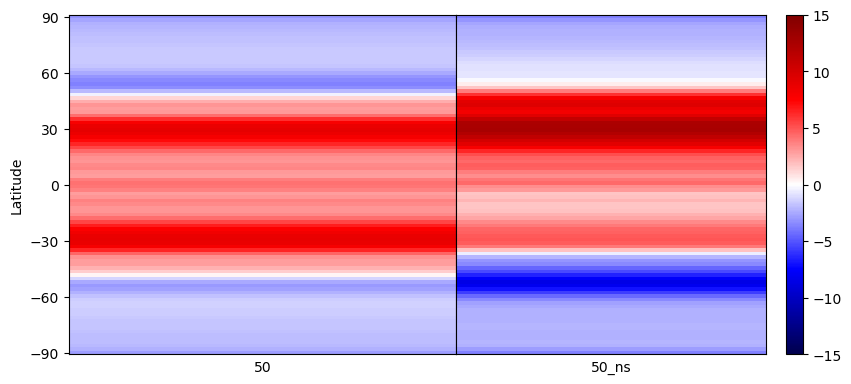

In [5]:

nrow = 1
ncol = 3
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0)
vmax=15
vmin=-15
plt.subplot(gs[0,0])
plt.pcolormesh(expp_50,plat_50,ppp_50,cmap='seismic',vmax=vmax, vmin=vmin)
plt.yticks(np.arange(-90, 91, 30))
plt.ylabel("Latitude")
plt.xticks([])
plt.xlabel("50")

plt.subplot(gs[0,1])
plt.pcolormesh(expp_50_ns,plat_50_ns,ppp_50_ns,cmap='seismic',vmax=vmax, vmin=vmin)
plt.xticks([])
plt.xlabel("50_ns")
ax = pylab.gca()
ax.yaxis.set_visible(False)



# Get the current axis
ax = pylab.gca()
# Set Y-axis visibility to False
ax.yaxis.set_visible(False)

#        plt.set_yticklabels([])

#plt.tight_layout() # do not use this!!
#plt.subplot(gs[0,8])
plt.colorbar(shrink=1)
plt.show()

In [9]:
TOA_50_n = (data_50_n.FSNT.mean('lon')-data_50_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_50_s = (data_50_s.FSNT.mean('lon')-data_50_s.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_50_ns=TOA_50_n+TOA_50_s
TOA_50 = (data_50.FSNT.mean('lon')-data_50.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))


Text(0.5, 1.0, 'TOA flux')

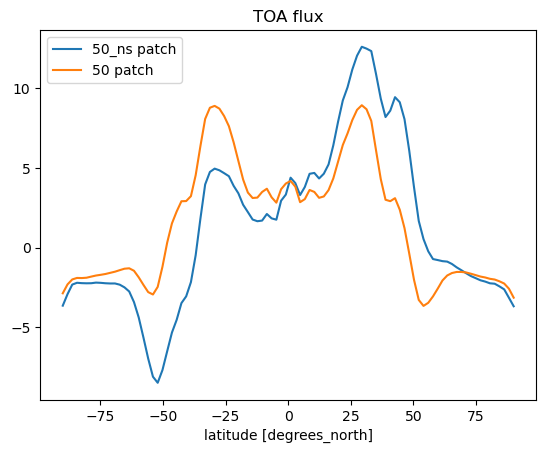

In [10]:

TOA_50_ns.plot( label='50_ns patch')
TOA_50.plot( label='50 patch')

plt.legend(loc='upper left')
plt.title('TOA flux')

In [12]:
Qs_50_n=(-data_50_n.FLNS.mean('lon')+data_50_n.FSNS.mean('lon')-data_50_n.SHFLX.mean('lon')-data_50_n.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_50_s=(-data_50_s.FLNS.mean('lon')+data_50_s.FSNS.mean('lon')-data_50_s.SHFLX.mean('lon')-data_50_s.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))

Qs_50_ns=Qs_50_n+Qs_50_s
Qs_50=(-data_50.FLNS.mean('lon')+data_50.FSNS.mean('lon')-data_50.SHFLX.mean('lon')-data_50.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))


Text(0.5, 1.0, 'Qs')

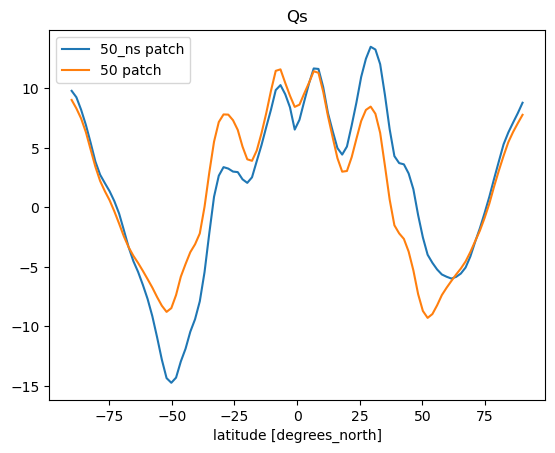

In [13]:
Qs_50_ns.plot( label='50_ns patch')
Qs_50.plot( label='50 patch')

plt.legend(loc='upper left')
plt.title('Qs')

In [14]:
Qa_50_n=Qs_50_n-TOA_50_n
Qa_50_s=Qs_50_s-TOA_50_s

Qa_50_ns=Qa_50_n+Qa_50_s
Qa_50=Qs_50-TOA_50

Text(0.5, 1.0, 'Qa')

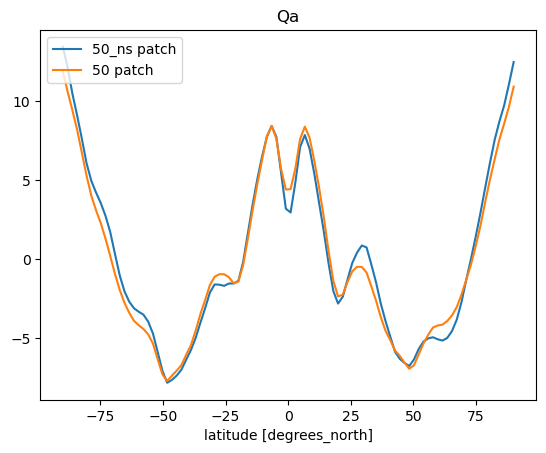

In [15]:
Qa_50_ns.plot( label='50_ns patch')
Qa_50.plot( label='50 patch')

plt.legend(loc='upper left')
plt.title('Qa')

In [16]:
T_50_n=data_50_n.T.mean('lon')-data_control.T.mean('lon')
T_50_s=data_50_s.T.mean('lon')-data_control.T.mean('lon')

T_50_ns=T_50_n+T_50_s
T_50=data_50.T.mean('lon')-data_control.T.mean('lon')


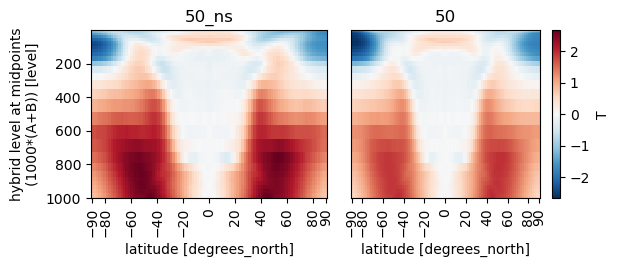

In [17]:
im = np.random.rand(28,28)
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.1)

plt.subplot(gs[0,0])
T_50_ns.plot(yincrease=False, cmap='RdBu_r',add_colorbar=False)
#plt.yscale("log")
plt.title('50_ns')
ax = pylab.gca()
plt.xticks([-90, -80, -60,-40,-20,0,20,40,60,80,90])
plt.yticks([1000, 800, 600,400,200])
plt.xticks(rotation=90)

plt.subplot(gs[0,1])
T_50.plot(yincrease=False, cmap='RdBu_r')
#plt.yscale("log")
plt.title('50')
ax = pylab.gca()
ax.yaxis.set_visible(False)
plt.xticks([-90, -80, -60,-40,-20,0,20,40,60,80,90])
plt.xticks(rotation=90)

# Get the current axis
ax = pylab.gca()
# Set Y-axis visibility to False
ax.yaxis.set_visible(False)

#        plt.set_yticklabels([])

#plt.tight_layout() # do not use this!!
#plt.subplot(gs[0,6])
#plt.colorbar()
plt.show()


In [18]:
css_50_n=data_50_n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_50_s=data_50_s.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')

css_50_ns=css_50_n+css_50_s
css_50=data_50.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')

csl_50_n=data_50_n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_50_s=data_50_s.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')

csl_50_ns=csl_50_n+csl_50_s
csl_50=data_50.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')

ass_50_n=data_50_n.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_50_s=data_50_s.FSNT.mean('lon')-data_control.FSNT.mean('lon')

ass_50_ns=ass_50_n+ass_50_s
ass_50=data_50.FSNT.mean('lon')-data_control.FSNT.mean('lon')

asl_50_n=data_50_n.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_50_s=data_50_s.FLNT.mean('lon')-data_control.FLNT.mean('lon')

asl_50_ns=asl_50_n+asl_50_s
asl_50=data_50.FLNT.mean('lon')-data_control.FLNT.mean('lon')

CRES_50_n = (data_50_n.FSNT.mean('lon')-data_50_n.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_50_s = (data_50_s.FSNT.mean('lon')-data_50_s.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))

CRES_50_ns=CRES_50_n+CRES_50_s
CRES_50 = (data_50.FSNT.mean('lon')-data_50.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))

CREL_50_n = (data_50_n.FLNT.mean('lon')-data_50_n.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_50_s = (data_50_s.FLNT.mean('lon')-data_50_s.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))

CREL_50_ns=CREL_50_n+CREL_50_s
CREL_50 = (data_50.FLNT.mean('lon')-data_50.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))


In [19]:
tcs_50_n=css_50_n-csl_50_n
tcs_50_s=css_50_s-csl_50_s

tcs_50_ns=tcs_50_n+tcs_50_s
tcs_50=css_50-csl_50

tas_50_n=ass_50_n-asl_50_n
tas_50_s=ass_50_s-asl_50_s

tas_50_ns=tas_50_n+tas_50_s
tas_50=ass_50-asl_50

tCRE_50_n=CRES_50_n-CREL_50_n
tCRE_50_s=CRES_50_s-CREL_50_s

tCRE_50_ns=tCRE_50_n+tCRE_50_s
tCRE_50=CRES_50-CREL_50



Text(0.5, 1.0, 'CRES')

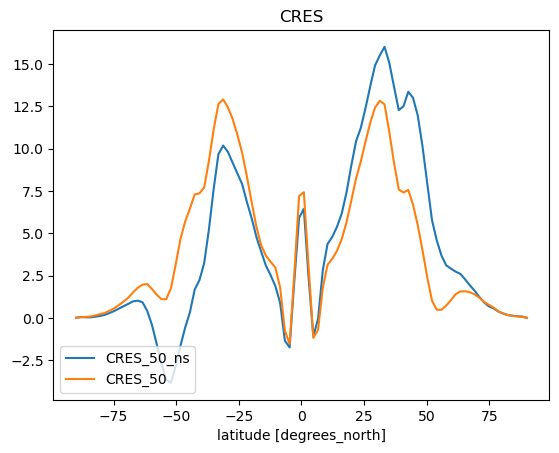

In [20]:


CRES_50_ns.plot(label='CRES_50_ns')
CRES_50.plot(label='CRES_50')


plt.legend(loc='lower left')
plt.title("CRES")

Text(0.5, 1.0, 'CREL')

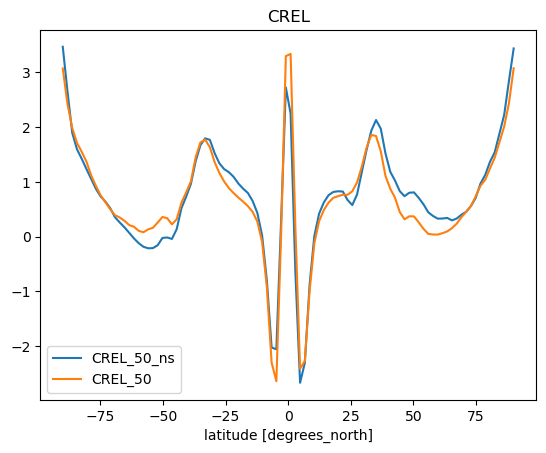

In [21]:
CREL_50_ns.plot(label='CREL_50_ns')
CREL_50.plot(label='CREL_50')


plt.legend(loc='lower left')
plt.title("CREL")

Text(0.5, 1.0, 'Total CRE')

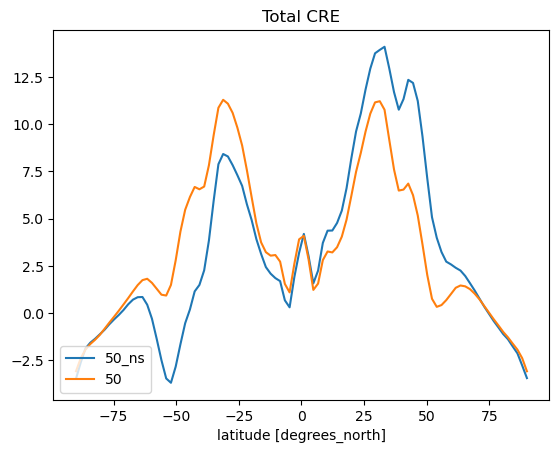

In [22]:
tCRE_50_ns.plot(label='50_ns')
tCRE_50.plot(label='50')


plt.legend(loc='lower left')
plt.title("Total CRE")

Text(0.5, 1.0, 'Total All Sky')

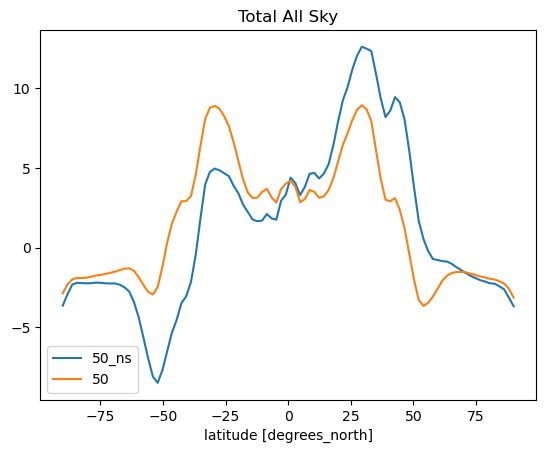

In [23]:
tas_50_ns.plot(label='50_ns')
tas_50.plot(label='50')


plt.legend(loc='lower left')
plt.title("Total All Sky")

Text(0.5, 1.0, 'Total Clear Sky')

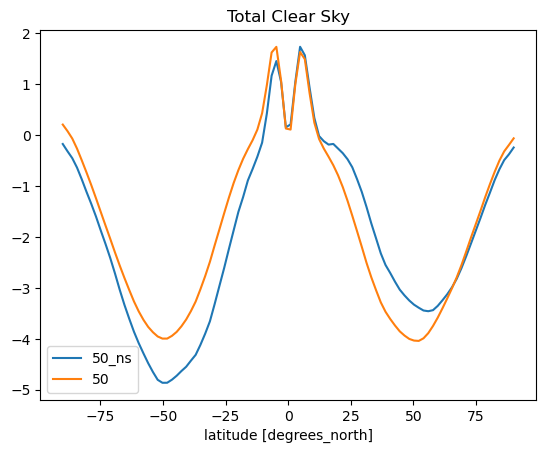

In [24]:
tcs_50_ns.plot(label='50_ns')
tcs_50.plot(label='50')


plt.legend(loc='lower left')
plt.title("Total Clear Sky")